Example of an estimation : 

In [1]:
import torch
import numpy as np 
import pandas as pd
import torch.multiprocessing as mp
import csv 
import sys 
import os
from functions_optim import *
import scipy.stats as st 

In [2]:
T_b=torch.unique(torch.tensor(pd.read_csv("data_cetacea/branching_times.csv")['x']),sorted=True)
Time=torch.linspace(0,T_b[-1],150)

f=0.8
tree_cet=tree(T_b,Time,f,"crown") #define the tree


In [4]:

estim_pdr=0.108 #pulled diversification rate estimated from the Cetacean phylogeny by M.L.

l_init=torch.full_like(Time,np.random.uniform(0.01,1.5)) #initial guess for the lambda function
m_init=l_init.clone()-estim_pdr #initial guess for the mu function
a_init=torch.log(l_init) #for sake of positivity
b_init=torch.log(m_init) #for sake of positivity

n_iter=170 #number of iterations
lr0=0.01 #initial learning rate
alpha=100. #penalty parameter for the lambda function
beta=10. #penalty parameter for the mu function

pen=penalties(["exp",2],["cpm",1],alpha,beta) #define the penalty class
optim_init=estim_param(a_init,b_init,n_iter,lr0) #define the optimization class
statistic="LTT" #statistic to fit


In [5]:
res=GD(optim_init,tree_cet,pen,statistic)

Epoch 00151: reducing learning rate of group 0 to 9.0000e-03.
Epoch 00167: reducing learning rate of group 0 to 8.1000e-03.


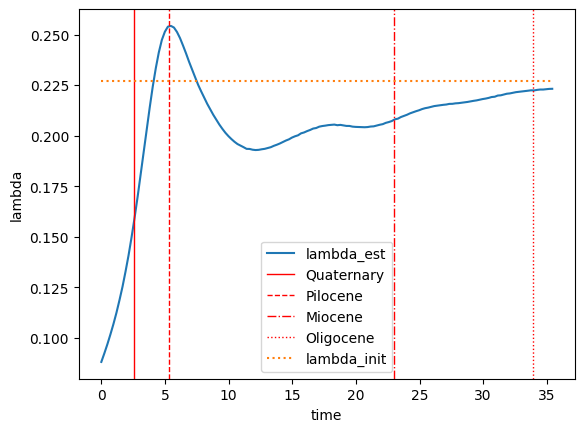

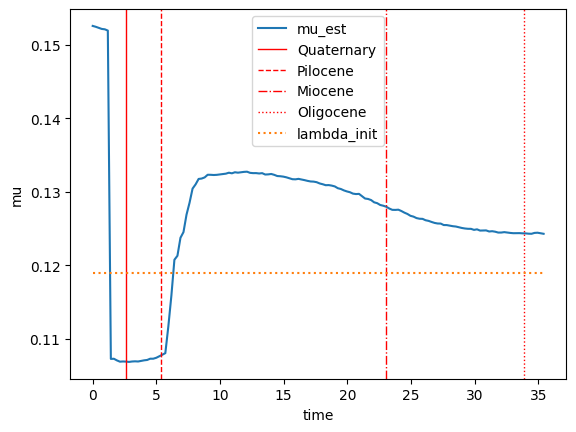

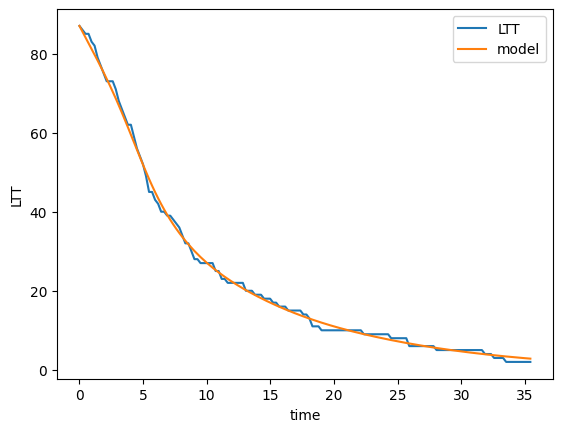

In [6]:
### ploting the results : 

Geo_t = [2.58, 5.333, 23.03, 33.9]
Geo_n = ["Quaternary", "Pilocene", "Miocene", "Oligocene", "Eocene"]


lamb_est = torch.exp(res[2][-1])
mu_est = torch.exp(res[3][-1])
plt.plot(tree_cet.T, lamb_est, label="lambda_est")

style=['-','--','-.',':']

for k in range(len(Geo_t)):
    plt.axvline(x=Geo_t[k], color='red', linestyle=style[k], linewidth=1, label=f'{Geo_n[k]}')

#plotting the initial guess 
plt.plot(tree_cet.T, torch.exp(a_init), label="lambda_init", linestyle='dotted')

plt.xlabel("time")

plt.ylabel("lambda")
plt.legend()
plt.show()

plt.plot(tree_cet.T, mu_est, label="mu_est")

for k in range(len(Geo_t)):
    plt.axvline(x=Geo_t[k], color='red',linestyle=style[k], linewidth=1, label=f'{Geo_n[k]}')

plt.plot(tree_cet.T, torch.exp(b_init), label="lambda_init", linestyle='dotted')

plt.xlabel("time")
plt.ylabel("mu")
plt.legend()
plt.show()

plt.plot(tree_cet.T, tree_cet.LTT, label="LTT")
plt.plot(tree_cet.T, model(lamb_est, mu_est, tree_cet.T, tree_cet.f, tree_cet.LTT[0]), label="model")
plt.xlabel("time")
plt.ylabel("LTT")
plt.legend()
plt.show()